Notebook to implement the basic iterations (weighted Jacobi, GS, red-black GS) in 1-D model problem.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

Model problem:  
- n = 64  
- initial guesses = y1, y3, y6  
- plot the maximum norm of the error, e  
- iteration number is 100  

In [20]:
def Jacobi(A, b, omega, x0, n_iter):
    Dinv = np.diag(1.0/np.diag(A))
    x = x0
    e = np.zeros((n_iter+1,))
    e[0] = np.linalg.norm(x, ord=np.inf)
    for i in range(n_iter):
        xprev = x
        residual = b - np.dot(A,xprev)
        x = omega*np.dot(Dinv,residual) + xprev
        e[i+1] = np.linalg.norm(x, ord=np.inf) # ground truth is x = 0

    return x, e

In [21]:
def GaussSeidel(A, b, x0, n_iter):
    D = np.diag(np.diag(A))
    U = -np.triu(A, 1)
    L = -np.tril(A, -1)
    DLinv = np.linalg.inv(D-L)
    RG = np.dot(DLinv,U)
    FG = np.dot(DLinv,b)

    x = x0
    e = np.zeros((n_iter+1,))
    e[0] = np.linalg.norm(x, ord=np.inf)
    for i in range(n_iter):
        x = np.dot(RG,x) + FG
        e[i+1] = np.linalg.norm(x, ord=np.inf) # ground truth is x = 0
    return x, e

In [22]:
def RedBlackGaussSeidel(A, b, x0, n_iter):
    U = -np.triu(A, 1)
    L = -np.tril(A, -1)
    Dinv = 1.0/np.diag(A)

    # Matrices of even components (red)
    idx_red = np.arange(2,np.size(b)-1,2)
    b_red = b[idx_red]
    U_red = U[idx_red,:]
    L_red = L[idx_red,:]
    Dinv_red = np.diag(Dinv[idx_red])
    RG_red = np.dot(Dinv_red,(L_red+U_red))
    FG_red = np.dot(Dinv_red,b_red)

    # Matrices of odd components (black)
    idx_black = np.arange(1,np.size(b),2)
    b_black = b[idx_black]
    U_black = U[idx_black,:]
    L_black = L[idx_black,:]
    Dinv_black = np.diag(Dinv[idx_black])
    RG_black = np.dot(Dinv_black,(L_black+U_black))
    FG_black = np.dot(Dinv_black,b_black)

    x = x0
    e = np.zeros((n_iter+1,))
    e[0] = np.linalg.norm(x, ord=np.inf)
    for i in range(n_iter):
        # First update the red points
        x[idx_red] = np.dot(RG_red,x) + FG_red
        # Then update the black points
        x[idx_black] = np.dot(RG_black,x) + FG_black
        e[i+1] = np.linalg.norm(x, ord=np.inf) # ground truth is x = 0
    return x, e

In [23]:
'''
Construct the linear equation system Ax = b for a temperature distribution problem:
-u"(x) + sigma*u(x) = f(x), 0<x<1, sigma >= 0
u(0) = u(1) = 0

Model problem is when b = 0, so ground truth is x = 0
Finite difference stencil is 1/(h^2)[-1  2+sigma*h^2  -1]
''' 
def ModelProblem(n, sigma):
    h = 1.0/n
    A = np.zeros((n+1,n+1))
    A_out = np.eye(n+1)
    for i in range(1,n):
        A[i,i-1:i+2] = [-1.0/h/h, sigma+2.0/h/h, -1.0/h/h]
    A_out[1:n,1:n] = A[1:n,1:n]
    return A_out

In [24]:
# Problem definition
n = 64
sigma = 0
A = ModelProblem(n, sigma) # output a matrix of size [n+1 x n+1]
b = np.zeros((n+1,))
x = np.linspace(0,1,n+1)

# Initial guess solution
y0_1 = np.sin(x*np.pi)
y0_3 = np.sin(3*x*np.pi)
y0_6 = np.sin(6*x*np.pi)

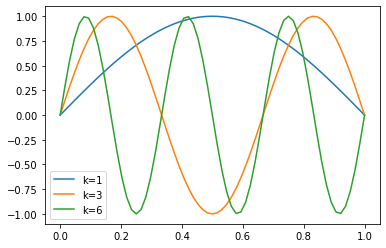

In [25]:
# Plot initial guess solutions
plt.plot(x,y0_1,label='k=1')
plt.plot(x,y0_3,label='k=3')
plt.plot(x,y0_6,label='k=6')
plt.legend()

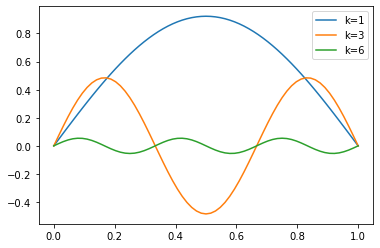

In [26]:
# Jacobi iteration with different initial solutions
y1, e1 = Jacobi(A, b, 2./3., y0_1, 100)
y3, e3 = Jacobi(A, b, 2./3., y0_3, 100)
y6, e6 = Jacobi(A, b, 2./3., y0_6, 100)
plt.plot(x,y1,label='k=1')
plt.plot(x,y3,label='k=3')
plt.plot(x,y6,label='k=6')
plt.legend()

Text(0, 0.5, 'Error')

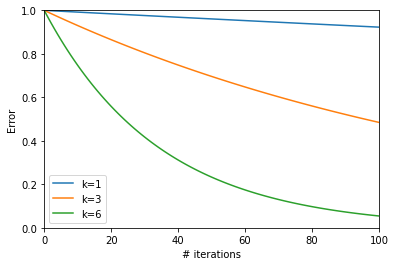

In [27]:
# Error evolution of Jacobi iterations
plt.plot(e1,label='k=1')
plt.plot(e3,label='k=3')
plt.plot(e6,label='k=6')
plt.xlim([0,100])
plt.ylim([0,1])
plt.legend()
plt.xlabel('# iterations')
plt.ylabel('Error')

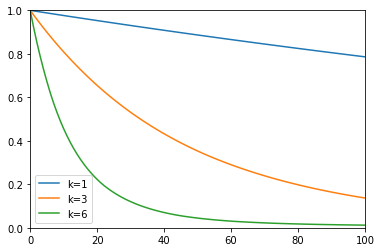

In [28]:
# GS iterations
y1, e1 = GaussSeidel(A, b, y0_1, 100)
y3, e3 = GaussSeidel(A, b, y0_3, 100)
y6, e6 = GaussSeidel(A, b, y0_6, 100)
plt.plot(e1,label='k=1')
plt.plot(e3,label='k=3')
plt.plot(e6,label='k=6')
plt.xlim([0,100])
plt.ylim([0,1])
plt.legend()

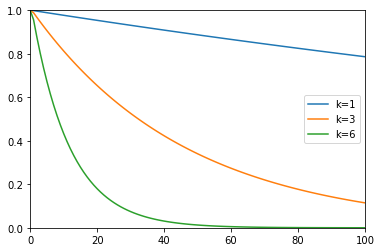

In [29]:
# Red-black GS iterations
y1, e1 = RedBlackGaussSeidel(A, b, y0_1, 100)
y3, e3 = RedBlackGaussSeidel(A, b, y0_3, 100)
y6, e6 = RedBlackGaussSeidel(A, b, y0_6, 100)
plt.plot(e1,label='k=1')
plt.plot(e3,label='k=3')
plt.plot(e6,label='k=6')
plt.xlim([0,100])
plt.ylim([0,1])
plt.legend()